In [12]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
import json

In [38]:
with open('config.json') as f:
    config = json.load(f)

data_path = config["data_path"]

ts = pd.read_csv(data_path)

In [39]:
ts = ts["Close"].values
ts_log = np.log(ts)
returns = np.diff(ts_log)

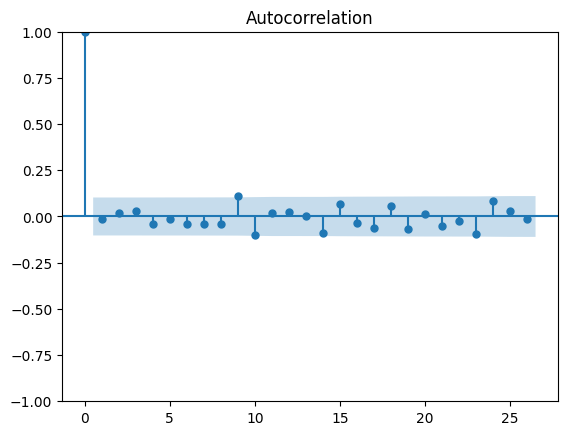

In [40]:
plot_acf(returns)
plt.show()

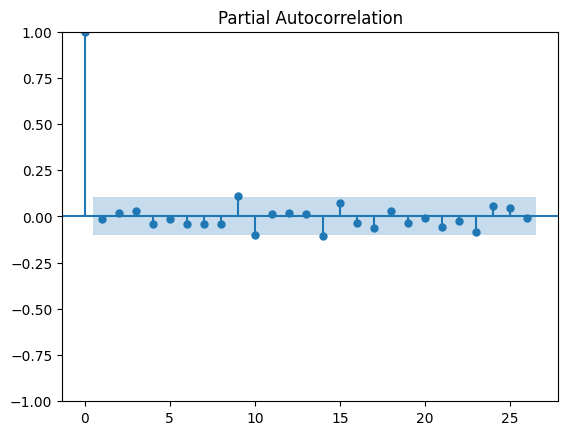

In [6]:
plot_pacf(returns)
plt.show()

In [7]:
unit_test = adfuller(returns)

#Print results
print('ADF Statistic: %f' % unit_test[0])
print('p-value: %f' % unit_test[1])
print('Critical Values:', unit_test[4])

if unit_test[1] <= 0.05:
    print(f'Reject the null hypothesis. The time-series is stationary.')
else: 
    print(f"Fail to reject the null hypothesis. The time-series is non-stationary")

ADF Statistic: -19.230854
p-value: 0.000000
Critical Values: {'1%': np.float64(-3.448493650810824), '5%': np.float64(-2.8695352280356556), '10%': np.float64(-2.5710293341377715)}
Reject the null hypothesis. The time-series is stationary.


In [5]:
train_size = int(len(ts)*0.70)
train, test = ts[:train_size], ts[train_size:]

In [8]:
lowest_bic = None
best_p = None
best_q = None

for p in range(1,6):
    for q in range(1,6):
        #create model
        model=ARIMA(train, order=(p,0,q))
        results = model.fit()

        #select model based on BIC
        bic = results.bic
        print(f"AR({p}), MA({q}), BIC: {bic}")
        if lowest_bic == None:
            lowest_bic = bic
            best_p = p
            best_q = q
        elif bic < lowest_bic:
            lowest_bic = bic
            best_p = p
            best_q = q

print(f"Best ARMA order: ({best_p},0,{best_q})")

AR(1), MA(1), BIC: 4349.822800128321
AR(1), MA(2), BIC: 4355.22261748496
AR(1), MA(3), BIC: 4359.319057584273
AR(1), MA(4), BIC: 4364.842291657439
AR(1), MA(5), BIC: 4370.286527362484


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR(2), MA(1), BIC: 4351.838668395218
AR(2), MA(2), BIC: 4360.354835000124
AR(2), MA(3), BIC: 4364.823250042098
AR(2), MA(4), BIC: 4370.412050862378


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(2), MA(5), BIC: 4372.698114132115
AR(3), MA(1), BIC: 4357.379710140339


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(3), MA(2), BIC: 4362.27830460258
AR(3), MA(3), BIC: 4362.318233692118
AR(3), MA(4), BIC: 4372.977732847291
AR(3), MA(5), BIC: 4378.0742858818985
AR(4), MA(1), BIC: 4364.851058388515


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(4), MA(2), BIC: 4361.822658619633
AR(4), MA(3), BIC: 4364.975392262833


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(4), MA(4), BIC: 4370.802629643347
AR(4), MA(5), BIC: 4382.273849903066
AR(5), MA(1), BIC: 4370.452750181473


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(5), MA(2), BIC: 4365.265022492936
AR(5), MA(3), BIC: 4370.912026650883


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(5), MA(4), BIC: 4381.260574482306
AR(5), MA(5), BIC: 4386.419899568854
Best ARMA order: (1,0,1)


In [ ]:
model = ARIMA(train, order=(6,0,8))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  254
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 486.320
Date:                Tue, 24 Oct 2023   AIC                           -964.640
Time:                        17:51:30   BIC                           -950.491
Sample:                             0   HQIC                          -958.948
                                - 254                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.003     -1.165      0.244      -0.008       0.002
ar.L1          0.7125      1.377      0.517      0.605      -1.987       3.412
ma.L1         -0.6959      1.417     -0.491      0.6

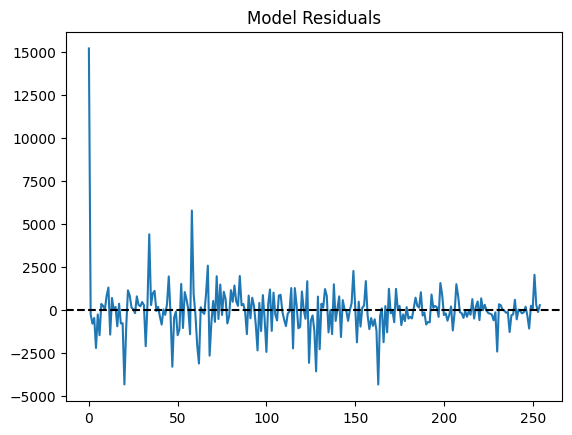

In [9]:
residuals = results.resid
plt.plot(residuals)
plt.axhline(y=0, c="black", linestyle="--")
plt.title("Model Residuals")
plt.show()

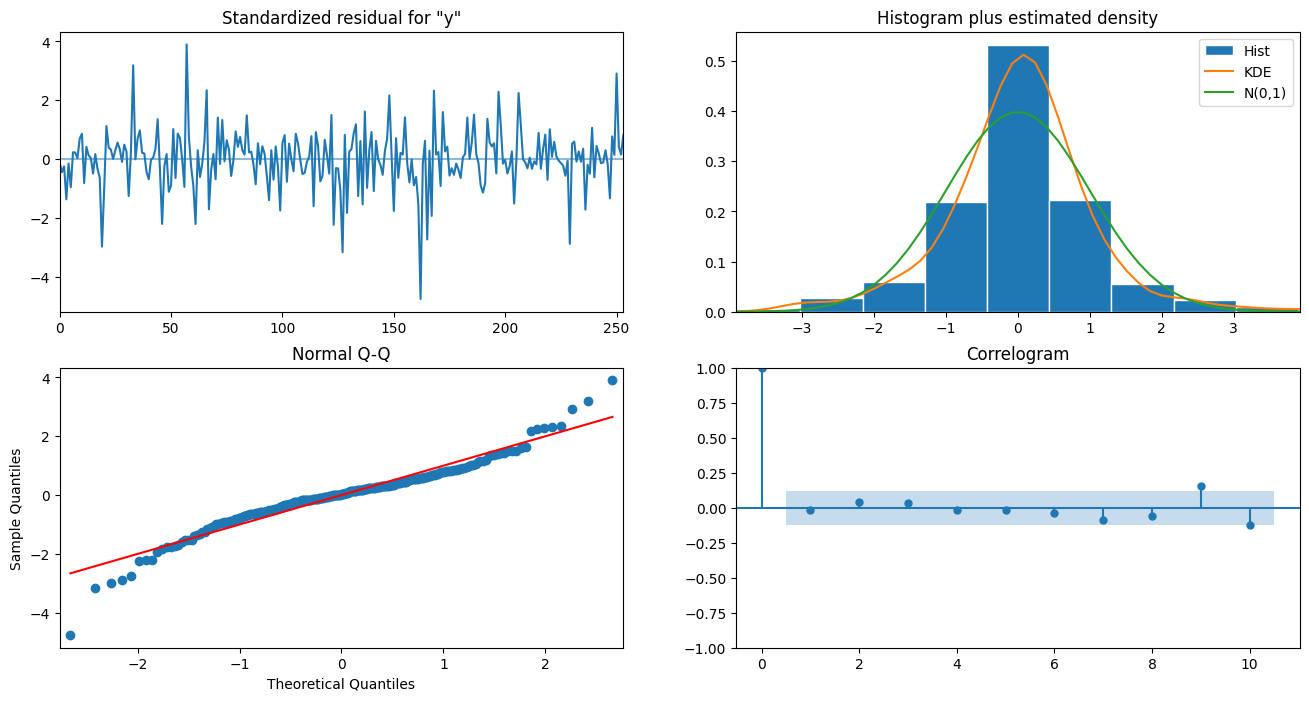

In [38]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [39]:
lagrange_t_stat, p_value, _, _ = acorr_breusch_godfrey(results, nlags=12)
print(f"Results from Breusch-Godfrey Test\nTest-Statistic: {lagrange_t_stat}\nP-Value: {p_value}")

if p_value <= 0.05:
    print(f"Reject the null hypothesis. Presence of serial correlation in the residuals is likely.")
else: 
    print(f"Fail to reject the null hypothesis. Evidence does not suggest serial correlation.")


Results from Breusch-Godfrey Test
Test-Statistic: 15.00182363296182
P-Value: 0.24133673656778618
Fail to reject the null hypothesis. Evidence does not suggest serial correlation.


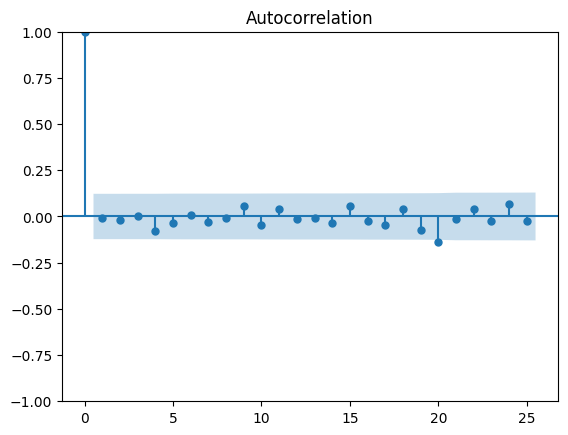

In [10]:
plot_acf(residuals)
plt.show()

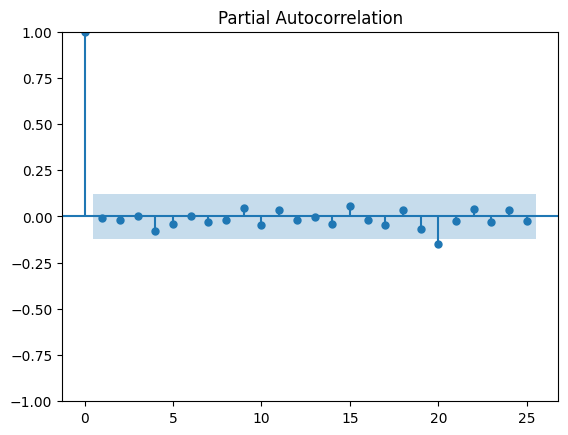

In [11]:
plot_pacf(residuals)
plt.show()

In [40]:
pred = results.get_prediction(start=0, dynamic=False)
pred_ci = pred.conf_int()
pred_mean = pred.predicted_mean


In [ ]:
fitted = results.fittedvalues

In [41]:
mse = mean_squared_error(train, pred_mean)
rmse = sqrt(mse)
print(f"Train RMSE: {rmse}")

Train RMSE: 0.03566497422126423


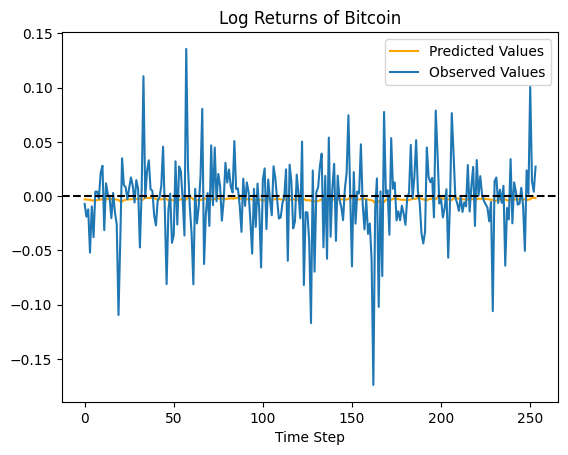

In [42]:
plt.plot(pred_mean, c='orange', label="Predicted Values")
plt.plot(train, label='Observed Values')
plt.axhline(y=0, c="black", linestyle="--")
plt.xlabel('Time Step')
plt.title('Log Returns of Bitcoin')
plt.legend()
plt.show()

## Model Testing


In [ ]:
def rolling_forecast():

    history = [train]
    predictions = []

    for i in range(len(test+1)):
        model = ARIMA(train, order=(p,0,q))
        results = model.fit()
        
        #One-step-ahead forecast
        y_hat = results.get_forecast(steps=1)
        y_hat_value = y_hat.mean[0]

        #Append history w/ next test value and predictions
        history.append(test[i])
        predictions.append(y_hat_value)
            